In [148]:
import pandas as pd
import numpy as np
import os

ds_path = os.path.join(os.getcwd(), '..', 'data')

df = pd.read_csv(os.path.join(ds_path, 'ds_salaries.csv'), index_col=0)

# Data Cleaning and Feature Creation

In [149]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [189]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd

def get_iso_codes() -> pd.DataFrame:
    r = requests.get('https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes').text
    soup = BeautifulSoup(r, 'html.parser')
    table = soup.findAll('table', class_ = 'wikitable sortable')
    iso_cc_df = pd.read_html(str(table[0]), header=None)[0]
    iso_cc_df = iso_cc_df.T.reset_index().drop(columns=['level_0']).iloc[[0, 3]].T.reset_index(drop=True).rename(columns={0: "Country Name", 3: "Code"}).iloc[1:, :]
    iso_cc_df.loc[1, :]['Code'] = "AF"
    iso_cc_df.dropna(inplace=True)
    to_drop = iso_cc_df[iso_cc_df['Code'].str.contains("See")].index
    iso_cc_df.drop(to_drop, inplace=True)
    iso_cc_df = iso_cc_df.reset_index(drop=True)
    return iso_cc_df

iso_cc_df = get_iso_codes()

In [191]:
iso_cc_df.to_csv("iso_cc.csv", index=False)

In [150]:
df.drop(columns=['salary', 'salary_currency'], inplace=True)

In [151]:
df['arrangement_type'] = df['remote_ratio'] // 50
df['arrangement_type'] = df['arrangement_type'].astype(int).map({0: 'On-site', 1: 'Hybrid', 2: 'Remote'})
df.drop(columns=['remote_ratio'], inplace=True)

In [152]:
ds_type = {
    ('data scientist', 'data science'): 'Data Science',
    ('data engineer', 'architect', 'etl'): "Data Engineering",
    ('machine learning', 'ml', 'ai', 'computer vision', 'nlp'): 'Machine Learning and Artificial Intelligence',
    ('data analysis', 'data analyst', 'analyst', 'analytics'): "Data Analysis",
    ('research', ): 'Academe',
    ('head of data', ): 'Head of Data'
}

for i, row in df.iterrows():
    labelled = False
    for titles, field in ds_type.items():
        if any(title in row['job_title'].lower() for title in titles):
            df.at[i, 'field'] = field
            labelled = True
            break
    if not labelled:
        df.at[i, 'field'] = 'Other'

df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size,arrangement_type,field
0,2020,MI,FT,Data Scientist,79833,DE,DE,L,On-site,Data Science
1,2020,SE,FT,Machine Learning Scientist,260000,JP,JP,S,On-site,Machine Learning and Artificial Intelligence
2,2020,SE,FT,Big Data Engineer,109024,GB,GB,M,Hybrid,Data Engineering
3,2020,MI,FT,Product Data Analyst,20000,HN,HN,S,On-site,Data Analysis
4,2020,SE,FT,Machine Learning Engineer,150000,US,US,L,Hybrid,Machine Learning and Artificial Intelligence


In [153]:
df = df[df['field'] != 'Other']

In [154]:
df['work_year'] = df['work_year'].astype(object)

In [155]:
df['brain_drain'] = df['employee_residence'] != df['company_location']
df['brain_drain'] = df['brain_drain'].map({True: 'Yes', False: 'No'})

In [156]:
df.to_csv(os.path.join(ds_path, 'ds_salaries_processed.csv'), index=False)

# Getting to know the Dataset

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_count_plot(df, x):
    plt.figure()
    counts = df[x].value_counts()
    sns.barplot(x=counts.values, y=counts.index)
    plt.title(f"Count Plot of {x}")
    plt.show()

def create_hist_plot(df, x):
    plt.figure()
    sns.histplot(x=df[x])
    plt.title(f"Histogram of {x}")
    plt.show()

In [159]:
analysis_df = pd.read_csv(os.path.join(ds_path, 'ds_salaries_processed.csv'))
analysis_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size,arrangement_type,field,brain_drain
0,2020,MI,FT,Data Scientist,79833,DE,DE,L,On-site,Data Science,No
1,2020,SE,FT,Machine Learning Scientist,260000,JP,JP,S,On-site,Machine Learning and Artificial Intelligence,No
2,2020,SE,FT,Big Data Engineer,109024,GB,GB,M,Hybrid,Data Engineering,No
3,2020,MI,FT,Product Data Analyst,20000,HN,HN,S,On-site,Data Analysis,No
4,2020,SE,FT,Machine Learning Engineer,150000,US,US,L,Hybrid,Machine Learning and Artificial Intelligence,No


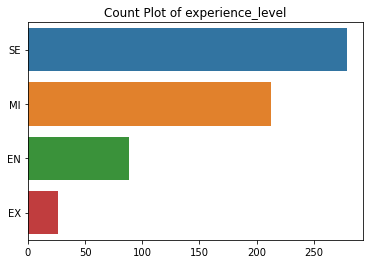

In [160]:
create_count_plot(analysis_df, 'experience_level')

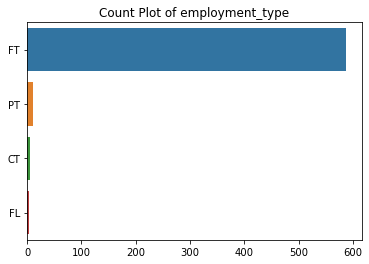

In [161]:
create_count_plot(analysis_df, 'employment_type')

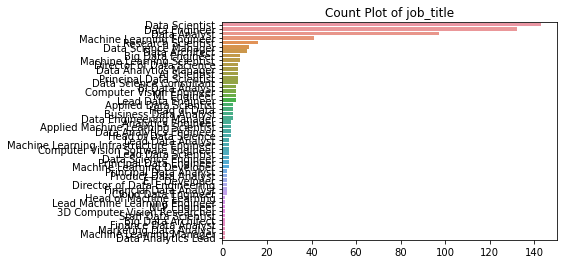

In [162]:
create_count_plot(analysis_df, 'job_title')

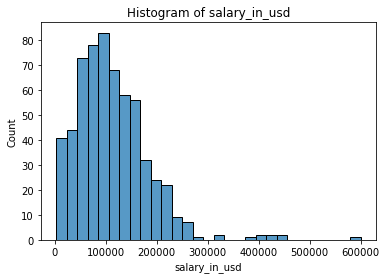

In [163]:
create_hist_plot(analysis_df, 'salary_in_usd')

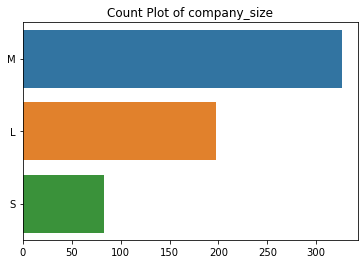

In [164]:
create_count_plot(analysis_df, 'company_size')

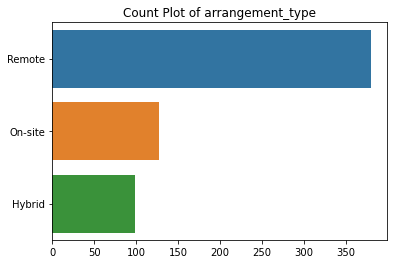

In [165]:
create_count_plot(analysis_df, 'arrangement_type')

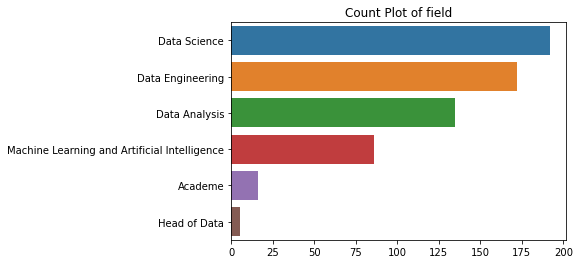

In [166]:
create_count_plot(analysis_df, 'field')

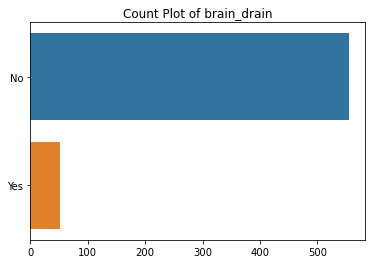

In [167]:
create_count_plot(analysis_df, 'brain_drain')

# Simple Questions

In [168]:
# How does Mean of Data Science Salaries changed over the years? per field?

analysis_df.groupby(['work_year', 'field']).mean().sort_values(by=['work_year', 'salary_in_usd'], ascending=[True, True])

salary_in_usd
work_year field                                                      
2020      Data Analysis                                  58838.692308
          Data Engineering                               87943.833333
          Data Science                                  102948.178571
          Machine Learning and Artificial Intelligence  106917.727273
          Academe                                       246000.000000
2021      Academe                                        83003.600000
          Machine Learning and Artificial Intelligence   92205.025000
          Data Analysis                                  95445.171429
          Data Science                                   96321.364865
          Data Engineering                              110163.611111
          Head of Data                                  189279.666667
2022      Academe                                       105569.000000
          Data Analysis                                 106201.126437
          Machine Learning and Artificial Intelligence  111695.342857
          Head of Data                                  116487.000000
          Data Engineering                              129321.510000
          Data Science                                  142908.466667

In [169]:
# What is the Mean Salary of Data Science Professionals per experience per year

analysis_df.groupby(['experience_level', 'field']).mean().sort_values(by=['experience_level', 'salary_in_usd'], ascending=[True, True])[['salary_in_usd']]

salary_in_usd
experience_level field                                                      
EN               Data Engineering                               53287.466667
                 Data Analysis                                  55050.111111
                 Data Science                                   58590.035714
                 Machine Learning and Artificial Intelligence   71710.826087
                 Academe                                        86132.000000
EX               Machine Learning and Artificial Intelligence   79039.000000
                 Data Analysis                                 140000.000000
                 Data Science                                  196375.818182
                 Head of Data                                  232500.000000
                 Data Engineering                              254288.571429
MI               Head of Data                                   32974.000000
                 Data Analysis                                  78704.071429
                 Data Engineering                               85505.656250
                 Data Science                                   87721.376812
                 Machine Learning and Artificial Intelligence   97466.366667
                 Academe                                       136498.142857
SE               Academe                                        88859.400000
                 Data Analysis                                 119264.414286
                 Machine Learning and Artificial Intelligence  128789.187500
                 Data Engineering                              144328.848837
                 Head of Data                                  151419.500000
                 Data Science                                  154984.071429

In [186]:
# Which Countries Experience Brain Drain?

bd_df = analysis_df[analysis_df['brain_drain']=="Yes"].groupby(['employee_residence']).count().sort_values(by='brain_drain', ascending=False)[['brain_drain']]
bd_df.head()
bd_df['brain_drain'] = round((bd_df['brain_drain'] / bd_df['brain_drain'].sum()) * 100, 2)
bd_df

,brain_drain
employee_residence,
IN,11.76
FR,7.84
PK,5.88
BR,5.88
VN,3.92
PT,3.92
RO,3.92
IT,3.92
RU,3.92


# Markov Chain Analysis

In [93]:
import networkx as nx

def create_graph_dict(df):
    init_residence = dict(zip(df['employee_residence'].unique(), [dict() for i in range(df['employee_residence'].nunique())]))
    for i, row in df.iterrows():
        if row['company_location'] in init_residence[row['employee_residence']]:
            init_residence[row['employee_residence']][row['company_location']] += 1
        else:
            init_residence[row['employee_residence']][row['company_location']] = 1

    to_delete = []
    residence_seqs = {}
    for employee_residence, counts in init_residence.items():
        total_cnts = sum(counts.values())

        if total_cnts == 1:
            to_delete.append(employee_residence)

        for country, count in counts.items():
            counts[country] = count / total_cnts
        residence_seqs[employee_residence] = counts

    return residence_seqs




def graph_top5_origin(df):
    top5_countries = df.groupby(['company_location']).count()['employee_residence'].sort_values(ascending=False).head(5)
    for country in top5_countries.index:
        graph_network(create_graph_dict(df), country)

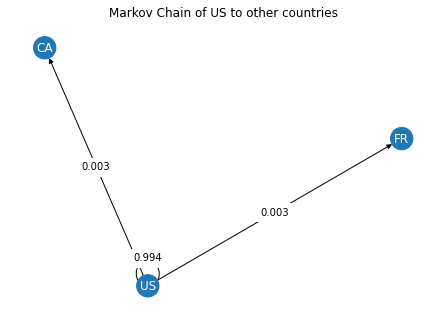

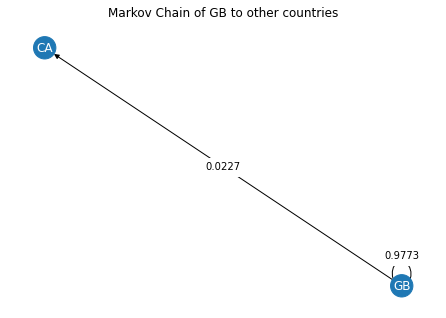

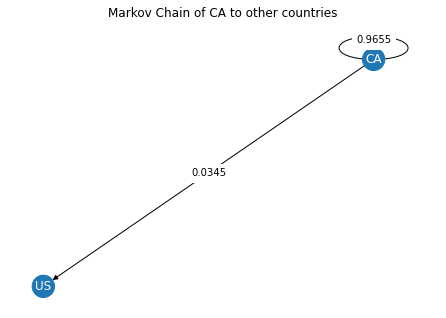

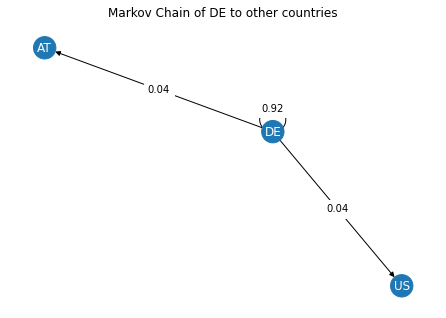

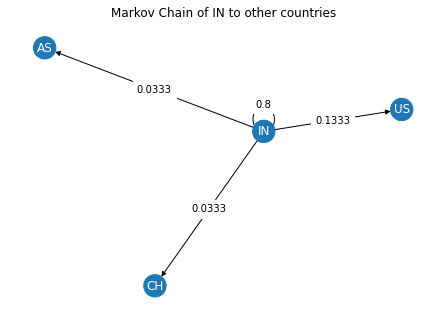

In [187]:
graph_top5_origin(analysis_df)

# Conclusions

# Recommendations for Future Studies